# Minicurso BigData Analisys with Python
lucio.oliveira@inatel.br
## Introdução ao Python
---


### Input e output

In [1]:
# isso é um comentário
'''
    Isso é um comentário de bloco,
    com várias linhas
'''

# variáveis e tipos
a = 1
b = 2.5
c = "Inatel"
d = True
e = False
g = [1,2,3,4]
h = ["a", "b", "c"]
i = ['A', 2]
j = {'cor': 'azul', 'tamanho': 30}
k = ('item 1', 'item 2')
l = [
    {'nome': "João", 'idade': 23},
    {'nome': "Maria", 'idade': 22}
]

In [2]:
print(a)
print("Seu nome: " + c)

1
Seu nome: Inatel


### Estruturas de controle

In [3]:
x = 10
if (x > 8):
    print("A varíavel x é maior do que 8")

A varíavel x é maior do que 8


In [4]:
x = 10
if (x > 10):
    print("A varíavel x é maior do que 8.")
elif x == 10:
    print("A varíavel x é exatamente 10.")
else:
    print("A variável x é menor do que 10.")

A varíavel x é exatamente 10.


In [5]:
nomes = ['Maria', 'Carlos', 'João']

for x in nomes:
    print(x)


Maria
Carlos
João


### Funções

In [6]:
def soma(a,b):
    return a + b

soma(2,3)

5

## Usando o Pandas

In [9]:
import pandas as pd

In [10]:
pd.DataFrame([1,2,3,4])

,0
0,1
1,2
2,3
3,4


In [11]:
pd.DataFrame([[1,2,3,4],[4,5,6,7]])

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [12]:
dados = [
    {'nome': "Maria", "idade": 20, 'np1': 30, 'np2': 35},
    {'nome': "João", "idade":21, 'np1': 33, 'np2': 38},
    {'nome': "Carlos", "idade":22, 'np1': 31, 'np2': 40},
    {'nome': "Marina", "idade":17, 'np1': 25, 'np2': 30},
]

In [13]:
pessoas = pd.DataFrame.from_dict(dados)

In [14]:
pessoas

,nome,idade,np1,np2
0,Maria,20,30,35
1,João,21,33,38
2,Carlos,22,31,40
3,Marina,17,25,30


In [15]:
pessoas['idade']

0    20
1    21
2    22
3    17
Name: idade, dtype: int64

In [16]:
pessoas['idade'].mean()

20.0

In [17]:
pessoas[(pessoas['nome'] == 'João')]

,nome,idade,np1,np2
1,João,21,33,38


In [18]:
pessoas['Nota Final'] = pessoas['np1'] + pessoas['np2']

In [19]:
pessoas

,nome,idade,np1,np2,Nota Final
0,Maria,20,30,35,65
1,João,21,33,38,71
2,Carlos,22,31,40,71
3,Marina,17,25,30,55


In [20]:
pessoas['maior'] = pessoas['idade'].apply(lambda x: True if x >= 18 else False)

In [21]:
pessoas

,nome,idade,np1,np2,Nota Final,maior
0,Maria,20,30,35,65,True
1,João,21,33,38,71,True
2,Carlos,22,31,40,71,True
3,Marina,17,25,30,55,False


## Prática com dados de 4G

### Pergunta 1: Verificar na célula que teve a maior média de tráfego no último ano, o mês e o dia com maior média de tráfego para entender o seu comportamento.

In [22]:
#importação de bibliotecas no python

import pandas as pd  #para trabalhar com o pandas (dataframes)
import numpy as np #para trabalhar com vetores e operações matemáticas de forma mais eficiente
import datetime  #biblioteca para manipular datas


In [23]:
# a variavel df recebe um dataframe que é lido a partir de um arquivo CSV.
# É possível ler muitos tipos de arquivos e transformá-los em dataframes para manipular com o python
df = pd.read_csv('4G_traffic.csv')

In [24]:
#nos mostra a quantidade de linhas e colunas
df.shape

(497544, 4)

In [25]:
#mostra algumas informações úteis e iniciais do DF
df.describe()

,Hour,Traffic
count,497544.000000,497544.000000
mean,11.496155,526.451673
std,6.911230,667.747113
min,0.000000,0.000000
25%,6.000000,73.683195
50%,11.000000,285.938680
75%,17.000000,725.174088
max,23.000000,10282.963340


In [26]:
# exibe as linhas e colunas iniciais do DF para entendermos como ele é
df.head()

,Date,Hour,CellName,Traffic
0,10/23/2017 0:00,7,Cell_001803,15.13867
1,10/23/2017 0:00,2,Cell_002303,2.05516
2,10/23/2017 0:00,7,Cell_004083,71.55308
3,10/23/2017 0:00,0,Cell_003781,557.98491
4,10/23/2017 0:00,3,Cell_000112,0.98166


In [27]:
#vamos declarar uma funcao para nos ajudar a unir a data e a hora em uma única coluna
#e também convertê-la para um objeto do tipo datetime
def join_date(row):
    date = row['Date'].split(' ')[0]
    hour = f" {row['Hour']}:00"
    return datetime.datetime.strptime(date+hour, '%m/%d/%Y %H:%M')

In [28]:
#podemos utilizar o apply para executar operações/aplicar funções em uma coluna ou série
#criamos uma nova coluna DateTime que tem o resultado da aplicação da função join_date
df['DateTime'] = df.apply(join_date, axis=1)

In [29]:
#vamos dar uma olhada no resultado
df.head()

,Date,Hour,CellName,Traffic,DateTime
0,10/23/2017 0:00,7,Cell_001803,15.13867,2017-10-23 07:00:00
1,10/23/2017 0:00,2,Cell_002303,2.05516,2017-10-23 02:00:00
2,10/23/2017 0:00,7,Cell_004083,71.55308,2017-10-23 07:00:00
3,10/23/2017 0:00,0,Cell_003781,557.98491,2017-10-23 00:00:00
4,10/23/2017 0:00,3,Cell_000112,0.98166,2017-10-23 03:00:00


In [30]:
#nao precisamos mais das colunas Date e Hour, podemos apagá-las
df.drop(['Date', 'Hour'], axis=1, inplace=True)

In [31]:
#vejamos o resultado
df.head()

,CellName,Traffic,DateTime
0,Cell_001803,15.13867,2017-10-23 07:00:00
1,Cell_002303,2.05516,2017-10-23 02:00:00
2,Cell_004083,71.55308,2017-10-23 07:00:00
3,Cell_003781,557.98491,2017-10-23 00:00:00
4,Cell_000112,0.98166,2017-10-23 03:00:00


In [32]:
#podemos reordenar colunas de um DF
df = df[['DateTime', 'CellName', 'Traffic']]

In [33]:
df.head()

,DateTime,CellName,Traffic
0,2017-10-23 07:00:00,Cell_001803,15.13867
1,2017-10-23 02:00:00,Cell_002303,2.05516
2,2017-10-23 07:00:00,Cell_004083,71.55308
3,2017-10-23 00:00:00,Cell_003781,557.98491
4,2017-10-23 03:00:00,Cell_000112,0.98166


In [34]:
#Uma função importante e útil é o agrupamento. 
#Podemos agrupar o DF por uma ou mais colunas e determinar uma operação nas colunas restantes.
df_avg = df.groupby(['CellName'])['Traffic'].mean()

In [35]:
#podemos ver a serie gerada
df_avg.head()

CellName
Cell_000111    826.539594
Cell_000112    395.399762
Cell_000113    502.557161
Cell_000231    507.977037
Cell_000232    428.892371
Name: Traffic, dtype: float64

In [36]:
# Podemos transformar uma serie em DF removendo os indices e também é possível ordernar um DF.
df_avg = df_avg.reset_index().sort_values(by='Traffic', ascending=False)

In [37]:
df_avg.head()

,CellName,Traffic
38,Cell_003793,1146.074445
47,Cell_006653,1041.518544
40,Cell_004072,1024.744420
15,Cell_001791,928.210292
45,Cell_006651,899.250459


In [38]:
#Podemos fazer um filtro pela celula que teve o maior tráfego.
df_cell93 = df[df['CellName'] == 'Cell_003793']

In [39]:
df_cell93.head()

,DateTime,CellName,Traffic
40,2017-10-23 16:00:00,Cell_003793,220.60219
53,2017-10-23 18:00:00,Cell_003793,2137.26495
61,2017-10-23 20:00:00,Cell_003793,3573.06291
67,2017-10-23 22:00:00,Cell_003793,569.25024
77,2017-10-23 10:00:00,Cell_003793,584.61053


In [40]:
#podemos agrupar por mês, para encontrar o mês da célula que teve maior tráfego 
df_cell93_month = df_cell93.set_index('DateTime').groupby(pd.Grouper(freq='M')).mean()

In [41]:
df_cell93_month.head()

,Traffic
DateTime,
2017-10-31,612.843579
2017-11-30,652.696231
2017-12-31,652.073250
2018-01-31,727.693129
2018-02-28,1070.738298


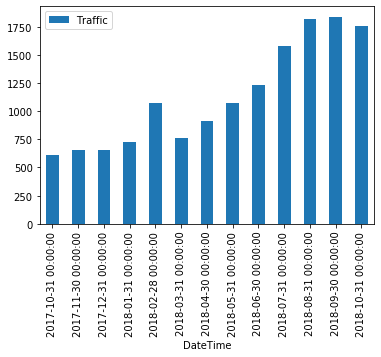

In [43]:
df_cell93_month.plot.bar()

In [44]:
#podemos aplicar um filtro para pegar somente as medidas do mês de maior média tráfego.
df_cell93_201809 = df_cell93[(df_cell93['DateTime'] > '2018-09-01') & (df_cell93['DateTime'] < '2018-09-30')]

In [45]:
df_cell93_201809.head()

,DateTime,CellName,Traffic
426735,2018-09-01 06:00:00,Cell_003793,886.81161
426746,2018-09-01 04:00:00,Cell_003793,218.04911
426780,2018-09-01 23:00:00,Cell_003793,2524.86956
426854,2018-09-01 17:00:00,Cell_003793,2704.64340
427015,2018-09-01 14:00:00,Cell_003793,1796.25271


In [46]:
df_cell93_201809_day = df_cell93_201809.set_index('DateTime').groupby(pd.Grouper(freq='D')).mean()

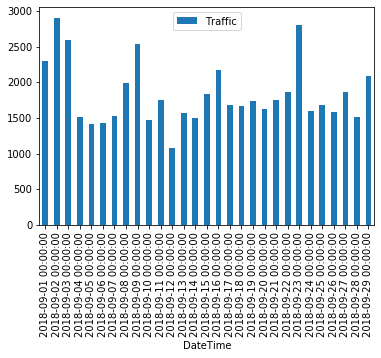

In [47]:
df_cell93_201809_day.plot.bar()

In [48]:
df_cell93_201809_day = df_cell93_201809_day.sort_values(by='Traffic', ascending=False)

In [49]:
df_cell93_201809_day.head()

,Traffic
DateTime,
2018-09-02,2905.031414
2018-09-23,2796.101143
2018-09-03,2592.898723
2018-09-09,2539.180058
2018-09-01,2299.637862


In [50]:
df_cell93_20180902 = df_cell93[(df_cell93['DateTime'] > '2018-09-02') & (df_cell93['DateTime'] < '2018-09-03')]

In [51]:
df_cell93_20180902.head()

,DateTime,CellName,Traffic
428204,2018-09-02 05:00:00,Cell_003793,825.79943
428270,2018-09-02 07:00:00,Cell_003793,1522.44144
428309,2018-09-02 23:00:00,Cell_003793,2800.44253
428354,2018-09-02 20:00:00,Cell_003793,3127.74672
428360,2018-09-02 10:00:00,Cell_003793,4232.54801


In [52]:
df_cell93_20180902 = df_cell93_20180902.sort_values(by='DateTime')

In [53]:
df_cell93_20180902.set_index('DateTime', inplace=True)

In [54]:
df_cell93_20180902.head()

,CellName,Traffic
DateTime,,
2018-09-02 01:00:00,Cell_003793,508.05927
2018-09-02 02:00:00,Cell_003793,1560.45242
2018-09-02 03:00:00,Cell_003793,151.06040
2018-09-02 04:00:00,Cell_003793,240.39783
2018-09-02 05:00:00,Cell_003793,825.79943


In [55]:
df_cell93_20180902

,CellName,Traffic
DateTime,,
2018-09-02 01:00:00,Cell_003793,508.05927
2018-09-02 02:00:00,Cell_003793,1560.45242
2018-09-02 03:00:00,Cell_003793,151.06040
2018-09-02 04:00:00,Cell_003793,240.39783
2018-09-02 05:00:00,Cell_003793,825.79943
2018-09-02 06:00:00,Cell_003793,945.77117
2018-09-02 07:00:00,Cell_003793,1522.44144
2018-09-02 08:00:00,Cell_003793,2598.27832
2018-09-02 09:00:00,Cell_003793,3684.60079


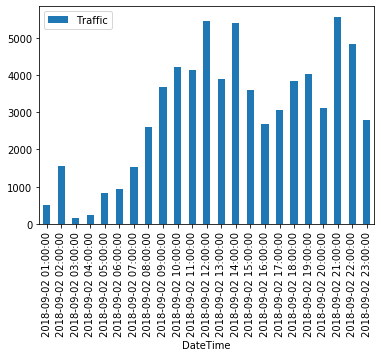

In [56]:
df_cell93_20180902.plot.bar()

### Pergunta 2: Quais os 10 horários e células com maior tráfego no último ano 

In [57]:
df.sort_values('Traffic', ascending=False)[:10]

,DateTime,CellName,Traffic
497477,2018-10-22 22:00:00,Cell_004073,10282.96334
445631,2018-09-14 03:00:00,Cell_004072,9640.18021
494679,2018-10-20 21:00:00,Cell_006661,8873.07994
206759,2018-03-23 15:00:00,Cell_000462,8619.50463
409097,2018-08-18 20:00:00,Cell_003793,8412.21761
363860,2018-07-16 14:00:00,Cell_006651,8403.72709
423149,2018-08-29 21:00:00,Cell_004072,8334.38913
303383,2018-06-02 16:00:00,Cell_006651,8201.65161
474203,2018-10-05 21:00:00,Cell_000111,8200.43549
485096,2018-10-13 20:00:00,Cell_006661,8122.70399
